In [1]:
import os
import itk                                                                
import itkwidgets
import numpy as np
import pandas as pd
import nibabel as nib
import seaborn as sns
from lib.utils import *
from nilearn import plotting
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

sns.set_style('darkgrid')

Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.


In [2]:
df = pd.read_csv("NFBS_Dataset_meta.csv")

In [3]:
def z_score(img, mask=None):
    img_data = img.get_fdata()
    if mask is not None and not isinstance(mask, str):
        mask_data = mask.get_fdata()
    else:
        mask_data = img_data == img_data
    logical_mask = mask_data > 0.  
    mean = img_data[logical_mask].mean()
    std = img_data[logical_mask].std()
    normalized = nib.Nifti1Image((img_data - mean) / std, img.affine, img.header)
    return normalized

In [4]:
def visualize_norm_and_unnorm_images(img, mask=None, preprocess=z_score):
    img = nib.load(img)
    mask = nib.load(mask) if mask is not None else None

    norm_img = np.expand_dims(preprocess(img, mask).get_fdata(), axis=3)
    img = np.expand_dims(img.get_fdata(), axis=3)

    def explore_3dimage(depth):
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(img[:, :, depth, :], cmap='gray')
        plt.title("Unnormalized Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(norm_img[:, :, depth, :], cmap='gray')
        plt.title("Intensity Normalized Image")

        plt.axis('off')

    interact(explore_3dimage, depth=(0, img.shape[2] - 1));

In [5]:
visualize_norm_and_unnorm_images(df['skull'][0])

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…

In [6]:
from intensity_normalization.normalize.kde import kde_normalize
visualize_norm_and_unnorm_images(df['skull'][0], preprocess=kde_normalize)

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…

In [7]:
plot_single_image('T1Img/sub-01/T1w.nii.gz', load=True)

interactive(children=(IntSlider(value=127, description='depth', max=255), Output()), _dom_classes=('widget-int…

Casting data from int32 to float32



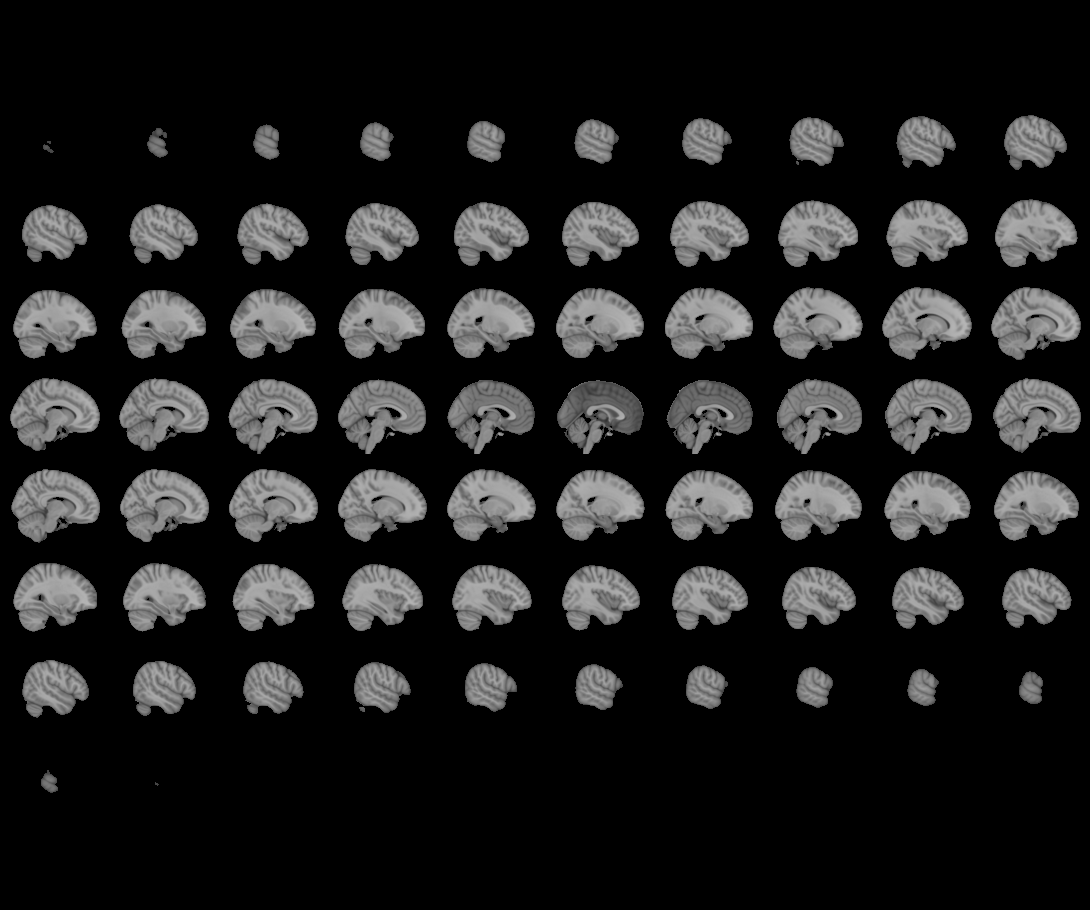
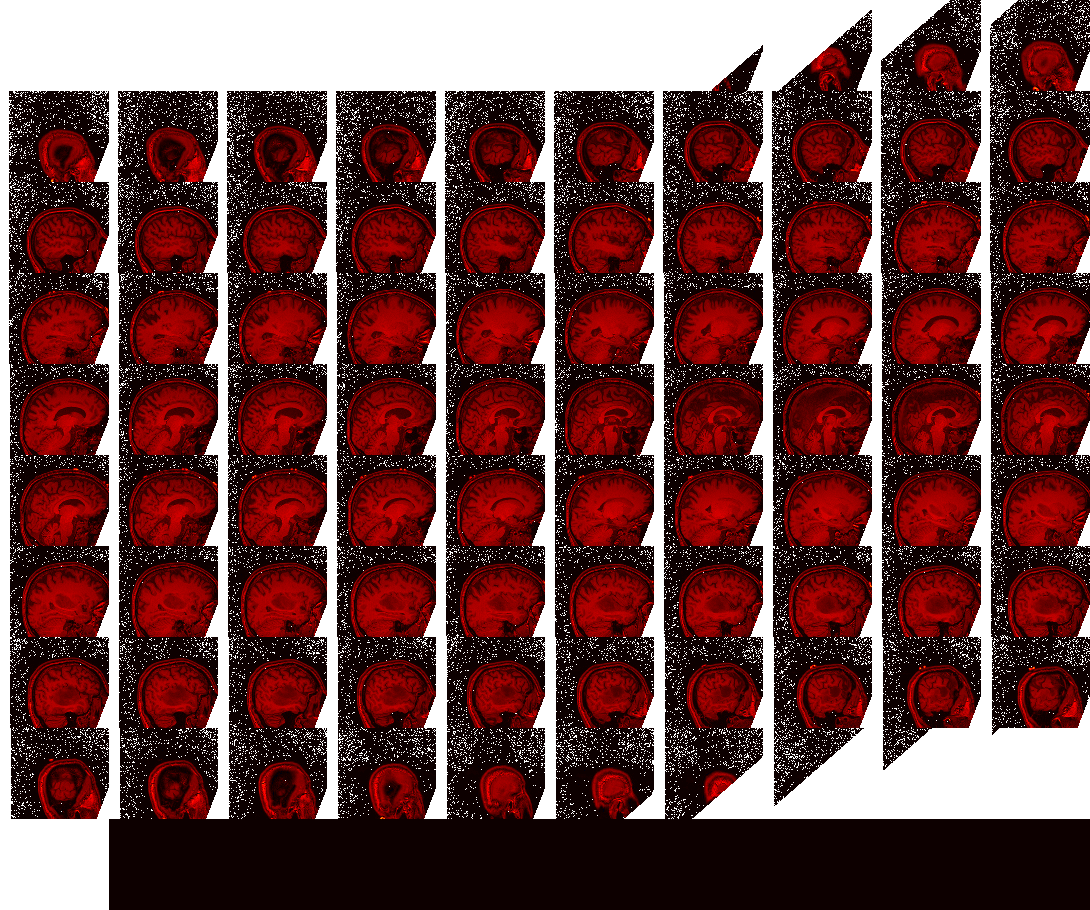

In [8]:
plotting.view_img(nib.load('T1Img/sub-01/T1w.nii.gz'))

In [9]:
plot_single_image('T1Img/sub-02/anat_img.nii.gz', load=True)

interactive(children=(IntSlider(value=127, description='depth', max=255), Output()), _dom_classes=('widget-int…

Casting data from int32 to float32



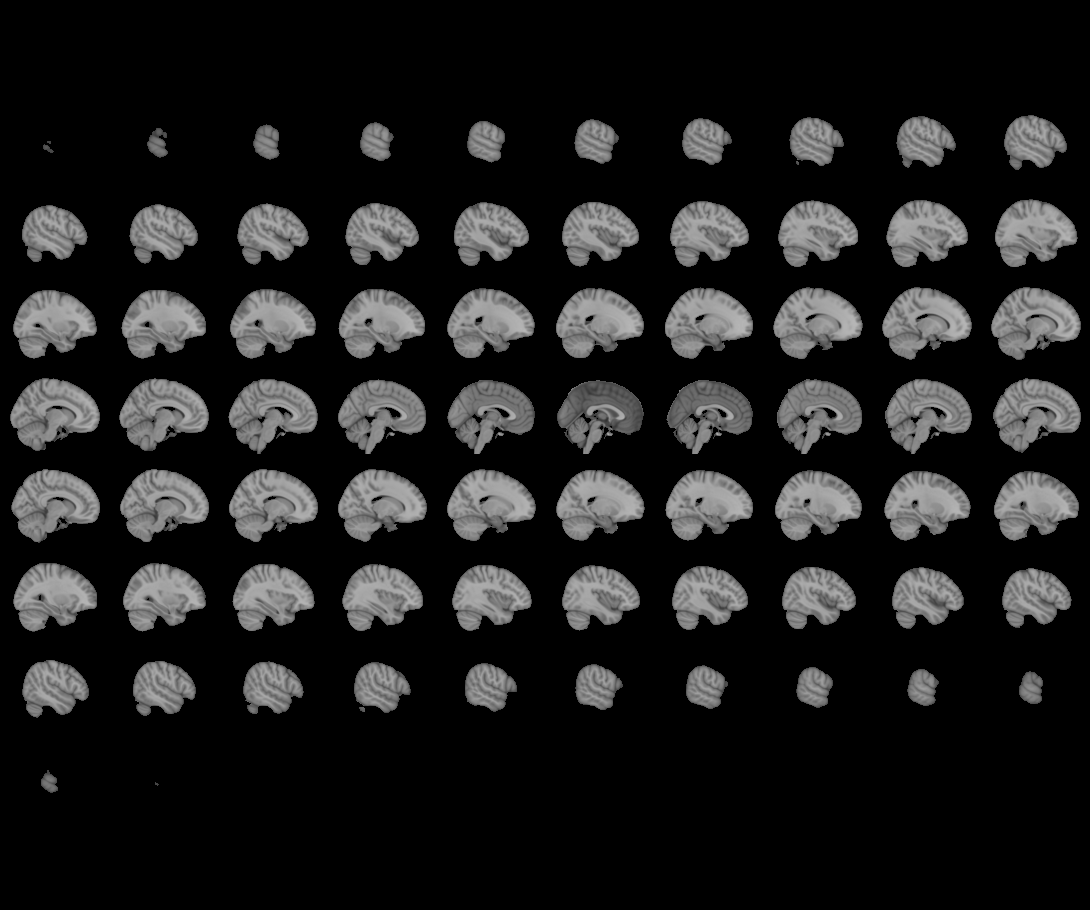
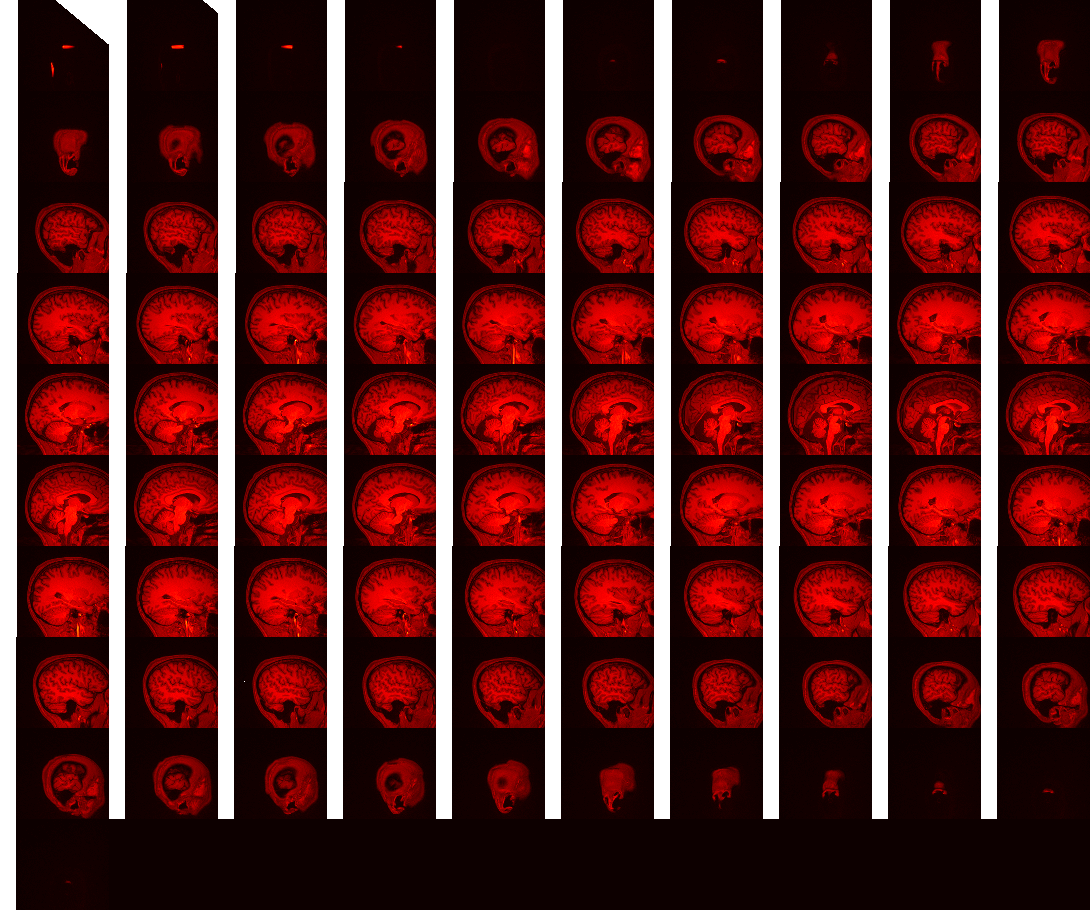

In [10]:
plotting.view_img(nib.load('T1Img/sub-02/anat_img.nii.gz'))

In [11]:
plot_single_image(df['skull'][0], load=True)

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…


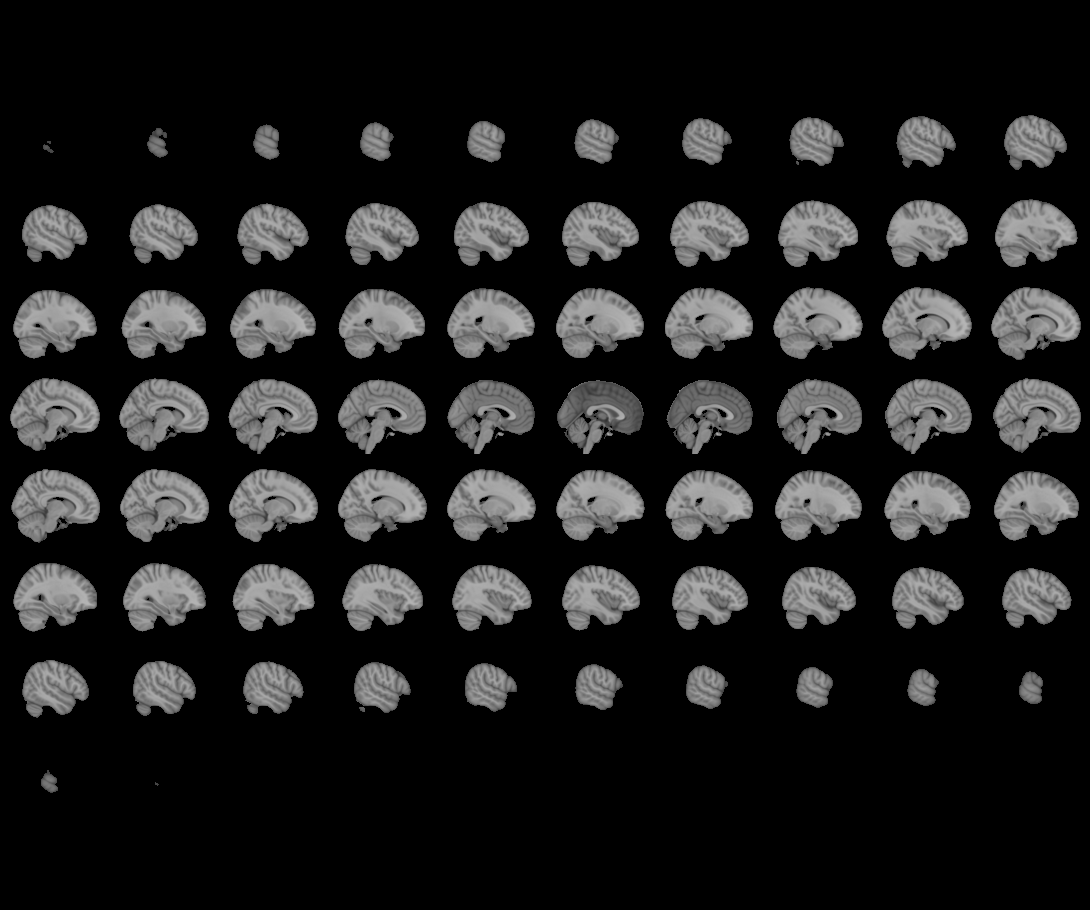

In [12]:
plotting.view_img(nib.load(df['skull'][0]))

In [13]:
plot_single_image(df['brain'][124], load=True)

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…


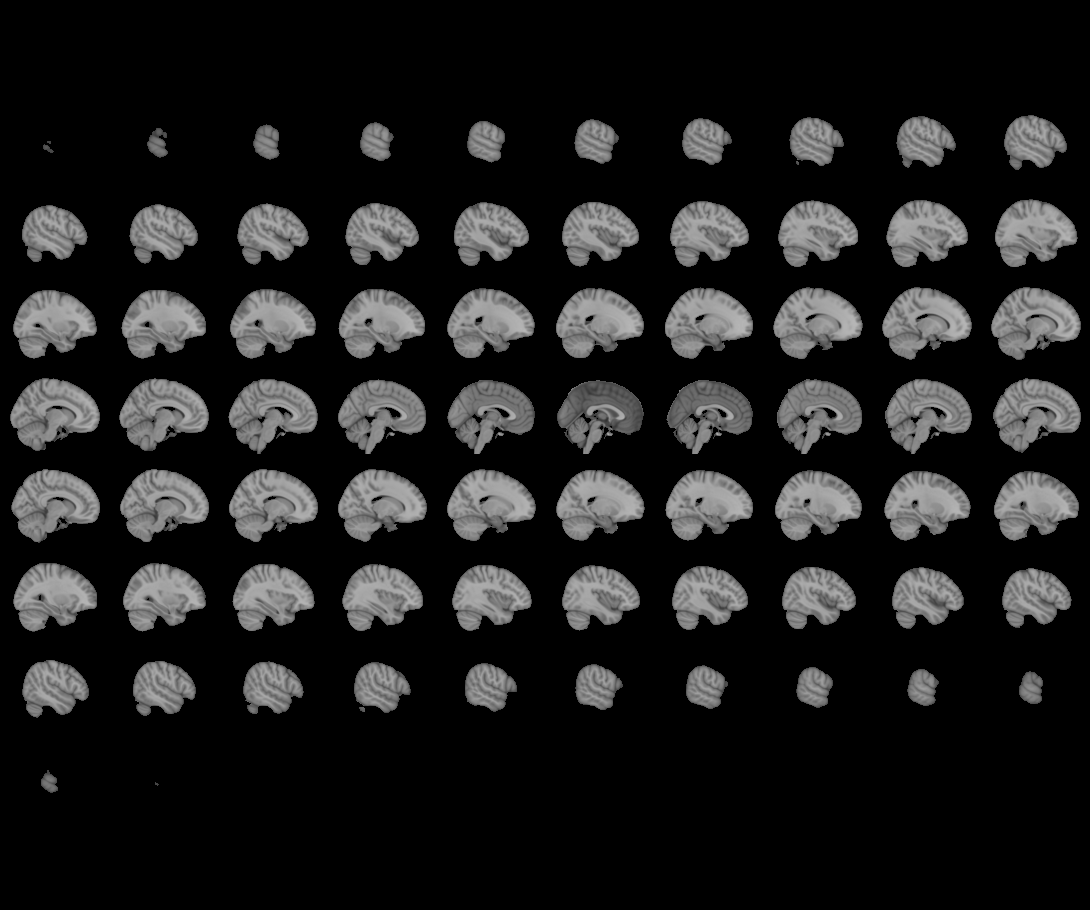
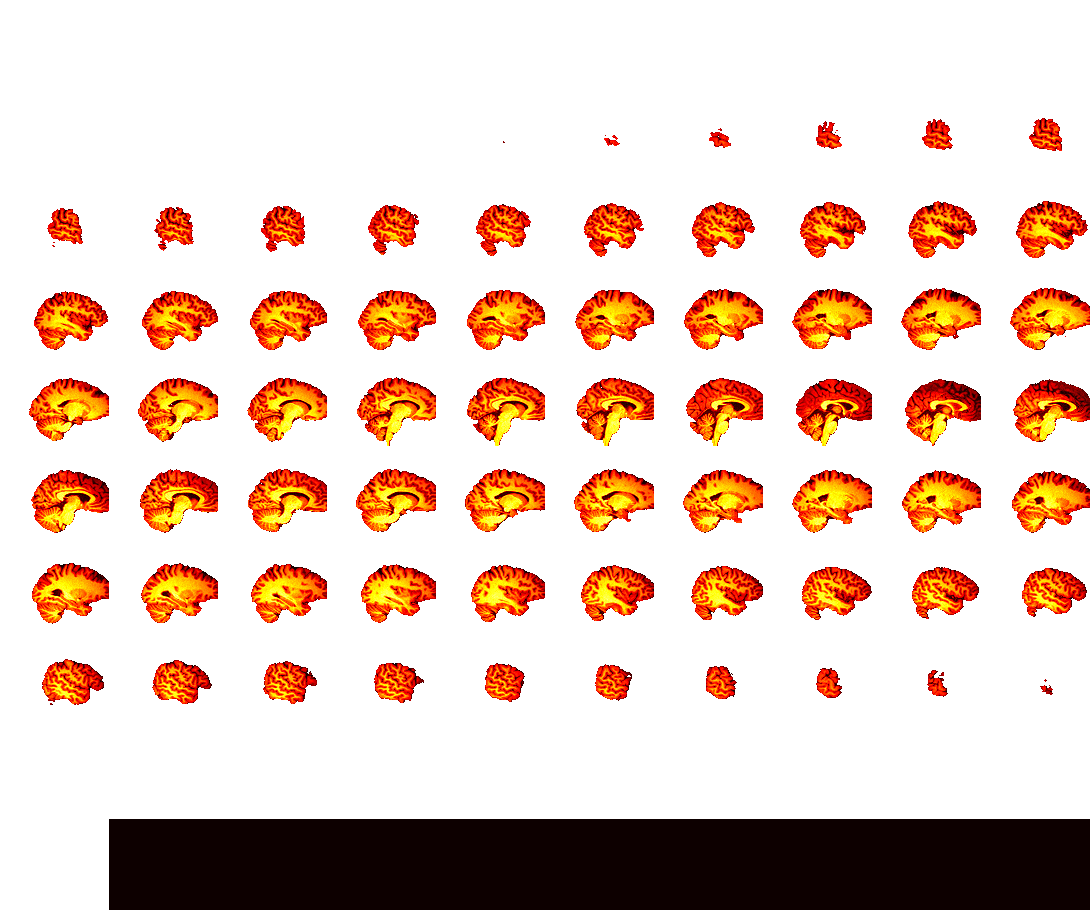

In [14]:
plotting.view_img(nib.load(df['brain'][124]))

In [15]:
plot_single_image('bias_corrected_image.nii.gz', load=True)

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…


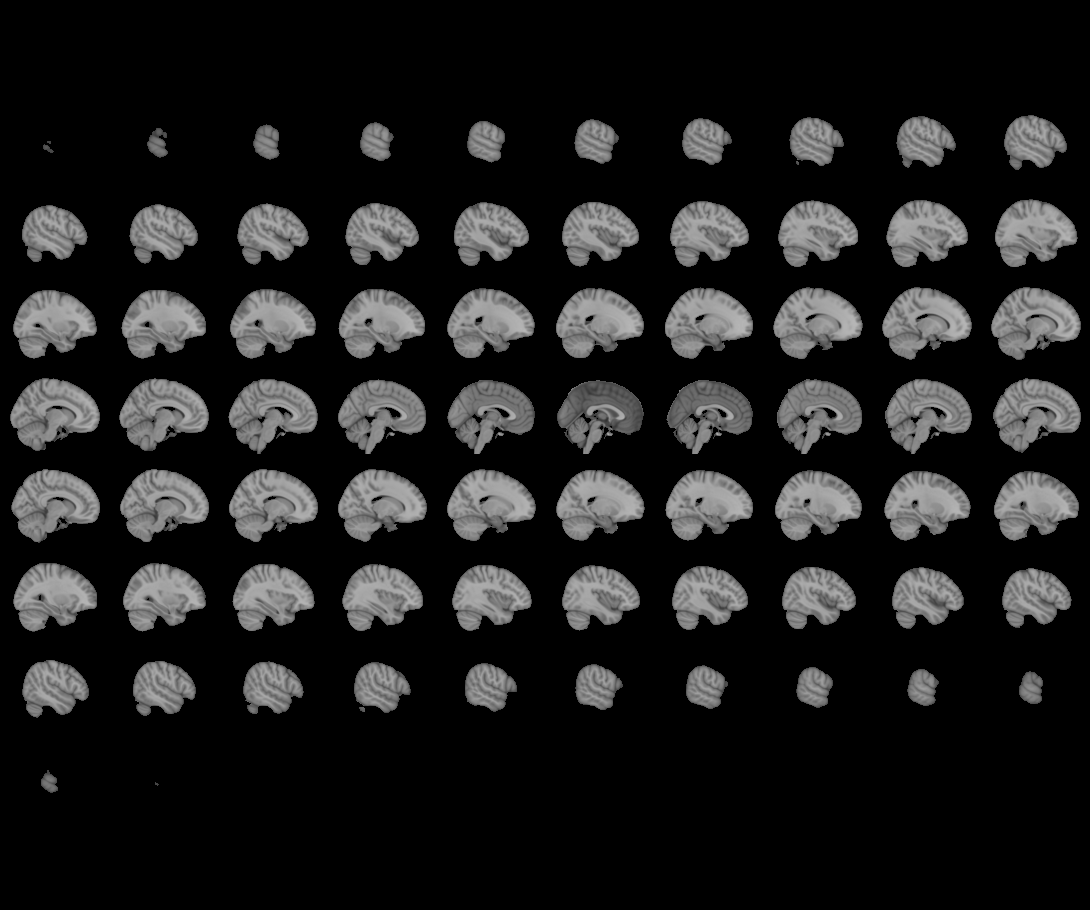

In [16]:
plotting.view_img(nib.load('bias_corrected_image.nii.gz'))

In [17]:
plot_multiple_images(images=df.loc[0].tolist(), load=True, axis=1)

interactive(children=(IntSlider(value=127, description='depth', max=255), Output()), _dom_classes=('widget-int…

In [18]:
plot_multiple_images(images=df.loc[0].tolist(), load=True, axis=2)

interactive(children=(IntSlider(value=127, description='depth', max=255), Output()), _dom_classes=('widget-int…

In [19]:
plot_multiple_images(images=df.loc[0].tolist(), load=True, axis=3)

interactive(children=(IntSlider(value=95, description='depth', max=191), Output()), _dom_classes=('widget-inte…